In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

**Dane Sabo**

*September 18th, 2024*

# Instructions

Please do a written solution for problems 1 and 2. We will review them on Monday, Sept 16 in class prior to the assignment being due.

Please upload a Jupyter Notebook for problems 3 and 4.

Problems 1 and 2 are worth 10 points each, problems 3 and 4 are worth 15 points each.

# Written Problems
**I assumed for both of these written problems that $t>0$.**

## Problem 1
Please find the general solution of 
$$
\bf{\dot{X}} = 
\begin{bmatrix}   
-1 & 5 & 2\\   
4 & -1 & -2\\
0 & 0 & 6
\end{bmatrix}
\bf{X}
$$

In [2]:
t = symbols('t', positive=True)
s = symbols('s')

x = Matrix([Function('x1')(t), Function('x2')(t), Function('x3')(t)])
x_dot = x.diff(t) 
A = Matrix([[-1, 5, 2],[4, -1, -2], [0, 0, 6]])

eq = Eq(x_dot,A*x)
eq

Eq(Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)],
[Derivative(x3(t), t)]]), Matrix([
[-x1(t) + 5*x2(t) + 2*x3(t)],
[ 4*x1(t) - x2(t) - 2*x3(t)],
[                   6*x3(t)]]))

First we have to find the fundamental matrix $\bf{\Psi}(t) = e^{\bf{A}t}$:
$$e^{\bf{A}t} = \mathcal{L}^{-1} \{ (sI-\bf{A})^{-1} \} $$

In [3]:
psi_t = ((s*eye(3) - A).inv()).applyfunc(lambda i: inverse_laplace_transform(i,s,t))
psi_t

Matrix([
[            exp(-t)*cosh(2*sqrt(5)*t), sqrt(5)*exp(-t)*sinh(2*sqrt(5)*t)/2,   4*exp(6*t)/29 + 3*sqrt(5)*exp(-t)*sinh(2*sqrt(5)*t)/29 - 4*exp(-t)*cosh(2*sqrt(5)*t)/29],
[2*sqrt(5)*exp(-t)*sinh(2*sqrt(5)*t)/5,           exp(-t)*cosh(2*sqrt(5)*t), -6*exp(6*t)/29 - 8*sqrt(5)*exp(-t)*sinh(2*sqrt(5)*t)/145 + 6*exp(-t)*cosh(2*sqrt(5)*t)/29],
[                                    0,                                   0,                                                                                  exp(6*t)]])

Now that we have our fundamental matrix, we know the following is true for an autonomous system:
$$ {\bf{x}}(t) = {\bf{\Psi}}(t) {\bf{C}}$$

In [4]:
c = Matrix([symbols('c1:4')])
psi_t*c.transpose()

Matrix([
[    c1*exp(-t)*cosh(2*sqrt(5)*t) + sqrt(5)*c2*exp(-t)*sinh(2*sqrt(5)*t)/2 + c3*(4*exp(6*t)/29 + 3*sqrt(5)*exp(-t)*sinh(2*sqrt(5)*t)/29 - 4*exp(-t)*cosh(2*sqrt(5)*t)/29)],
[2*sqrt(5)*c1*exp(-t)*sinh(2*sqrt(5)*t)/5 + c2*exp(-t)*cosh(2*sqrt(5)*t) + c3*(-6*exp(6*t)/29 - 8*sqrt(5)*exp(-t)*sinh(2*sqrt(5)*t)/145 + 6*exp(-t)*cosh(2*sqrt(5)*t)/29)],
[                                                                                                                                                             c3*exp(6*t)]])

In [5]:
eq2 = Eq(x,psi_t*c.transpose())
eq2

Eq(Matrix([
[x1(t)],
[x2(t)],
[x3(t)]]), Matrix([
[    c1*exp(-t)*cosh(2*sqrt(5)*t) + sqrt(5)*c2*exp(-t)*sinh(2*sqrt(5)*t)/2 + c3*(4*exp(6*t)/29 + 3*sqrt(5)*exp(-t)*sinh(2*sqrt(5)*t)/29 - 4*exp(-t)*cosh(2*sqrt(5)*t)/29)],
[2*sqrt(5)*c1*exp(-t)*sinh(2*sqrt(5)*t)/5 + c2*exp(-t)*cosh(2*sqrt(5)*t) + c3*(-6*exp(6*t)/29 - 8*sqrt(5)*exp(-t)*sinh(2*sqrt(5)*t)/145 + 6*exp(-t)*cosh(2*sqrt(5)*t)/29)],
[                                                                                                                                                             c3*exp(6*t)]]))

## Problem 2
Please find the general solution of 
$$
\bf{\dot{X}} = 
\begin{bmatrix}   
-6 & 5 \\   
-5 & 4 \\
\end{bmatrix}
\bf{X}
$$

Following the same process as problem 1:

In [6]:
t = symbols('t', positive=True)
s = symbols('s')

x = Matrix([Function('x1')(t), Function('x2')(t)])
x_dot = x.diff(t) 
A = Matrix([[-6, 5],[-5, 4]])

eq = Eq(x_dot,A*x)
eq

⎡d        ⎤                       
⎢──(x₁(t))⎥                       
⎢dt       ⎥   ⎡-6⋅x₁(t) + 5⋅x₂(t)⎤
⎢         ⎥ = ⎢                  ⎥
⎢d        ⎥   ⎣-5⋅x₁(t) + 4⋅x₂(t)⎦
⎢──(x₂(t))⎥                       
⎣dt       ⎦                       


In [7]:
psi_t = ((s*eye(2) - A).inv()).applyfunc(lambda i: inverse_laplace_transform(i,s,t))
psi_t

Matrix([
[-5*t*exp(-t) + exp(-t),           5*t*exp(-t)],
[          -5*t*exp(-t), 5*t*exp(-t) + exp(-t)]])

In [8]:
c = Matrix([symbols('c1:3')])
psi_t*c.transpose()

Matrix([
[c1*(-5*t*exp(-t) + exp(-t)) + 5*c2*t*exp(-t)],
[-5*c1*t*exp(-t) + c2*(5*t*exp(-t) + exp(-t))]])

In [9]:
eq2 = Eq(x,psi_t*c.transpose())
eq2

Eq(Matrix([
[x1(t)],
[x2(t)]]), Matrix([
[c1*(-5*t*exp(-t) + exp(-t)) + 5*c2*t*exp(-t)],
[-5*c1*t*exp(-t) + c2*(5*t*exp(-t) + exp(-t))]]))

# Python Problems
## Problem 3
The Archimedes Spiral can be plotted by taking all the positive whole numbers (e.g.j = 0, 1, 2, 3, 4, 5, ...) and putting them into the format $n = (j,j)$ , and plotting them in polar coordinates where the first term, $n_1$, is the radius, and the second term, $n_2$, is the angle in radians.
### Part A
You need to plot the first 1000 terms in a scatter plot. In addition, we would like to only look at the top right quadrant! What you're going for is shown in Figure 1.

In [10]:
archimedes_nos = np.array(range(1000))

Text(0.5, 1.0, 'Archimedes Spiral, 1st Quadrant')

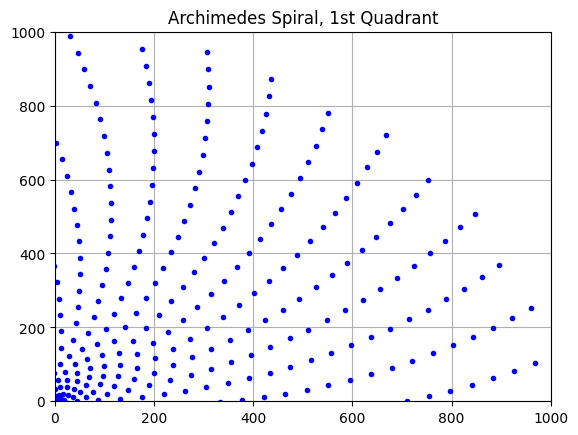

In [11]:
x = archimedes_nos*np.cos(archimedes_nos)
y = archimedes_nos*np.sin(archimedes_nos)
plt.figure()
plt.plot(x,y,'.b')
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.grid()
plt.title("Archimedes Spiral, 1st Quadrant")

### Part B
You need to plot the first 25 terms, looking at the entire polar plot (all quadrants, and then, put a *smooth* line through it. What you're going for is shown in Figure 2.)
Hint: [This will be a useful reference](https://matplotlib.org/stable/gallery/pie_and_polar_charts/index.html)

Text(0.5, 1.0, 'Polar Plot of First 25 Archimedes Spiral Terms')

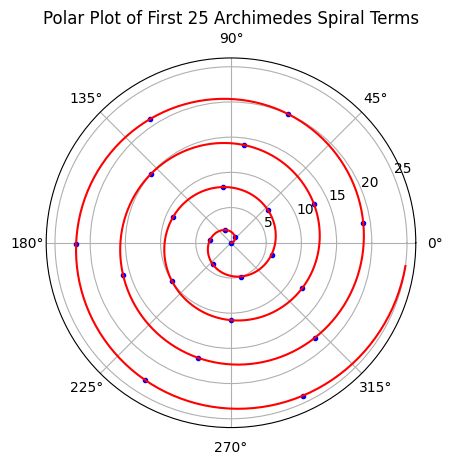

In [12]:
plt.figure()
plt.polar(archimedes_nos[:25],archimedes_nos[:25],'.b')
plt.polar(np.linspace(0,25,1000),np.linspace(0,25,1000),'-r')

plt.title("Polar Plot of First 25 Archimedes Spiral Terms")

## Problem 4
Consider the following system:
$$
\bf{\dot{X}} = 
\begin{bmatrix}   
1 & 2 & 1\\   
3 & 1+x & 1\\
1 & 0 & 0
\end{bmatrix}
\bf{X}
$$
This linear differential equation system’s behavior is governed by its eigenvalues. In particular, the eigenvalues relate to stability and we may wish to see where they cross the 0 line (in terms of their real value). The constant x varies over the interval [−5, 5]. Using a Jupyter Notebook (local, or on Google Colab), Python, NumPy, and Matplotlib’s PyPlot, you should evaluate the eigenvalues for 50 evenly spaced values of x between −5 and 5, and produce a plot that visualizes the variation in the three eigenvalues as x varies. An example plot is shown in Figure 3 (for a different matrix!)

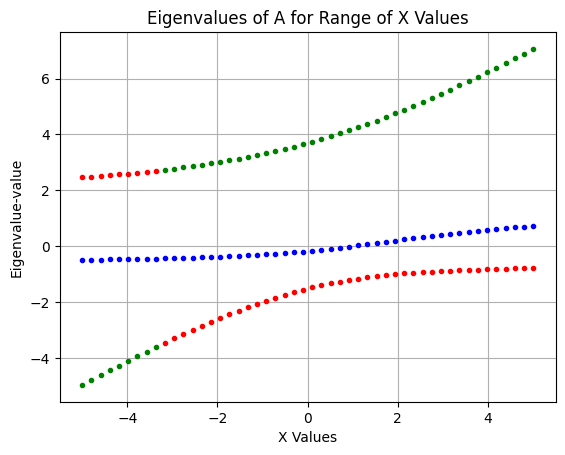

In [13]:
#A cursed line of code.
import matplotlib.pyplot as plt; import numpy as np; eig = lambda x: np.linalg.eig([[1, 2, 1], [3, 1+x, 1], [1, 0, 0]])[0]; x_vals = np.linspace(-5, 5, 50); [plt.plot(x, eig(x)@[0,0,1], '.b', x, eig(x)@[0,1,0], '.r', x, eig(x)@[1,0,0], '.g') for x in x_vals]; plt.title("Eigenvalues of A for Range of X Values"); plt.xlabel("X Values"); plt.ylabel("Eigenvalue-value"); plt.grid(); plt.show()

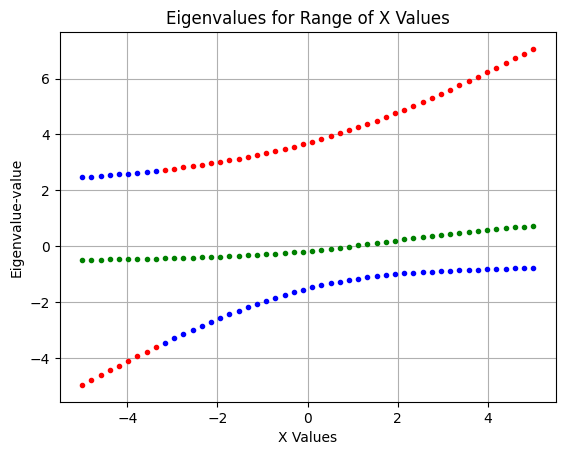

In [14]:
#Human Readable Code
#Create Eigenvalue Function
eig = lambda x: np.linalg.eig([[1, 2, 1],[3, 1+x, 1],[1,0,0]]).eigenvalues

#Allocate memory to x and eigenvalue storage
x = np.linspace(-5,5,50)
eigs = np.zeros((3,50))

#Calculate eigenvalues
for i in range(50):
    eigs[:,i] = eig(x[i])

#Plotting
plt.figure()
plt.title("Eigenvalues for Range of X Values")
plt.plot(x,eigs[0,:],'.r',x,eigs[1,:],'.b',x,eigs[2,:],'.g')
plt.xlabel("X Values")
plt.ylabel("Eigenvalue-value")
plt.grid()